### Imports

In [1]:
import os
from PIL import Image

import torch
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision

import matplotlib.pyplot as plt
from matplotlib import patches

### Initialize Parameters

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
transformations = transforms.Compose([
    transforms.ToTensor()
])

### Initialize Model

In [7]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=4)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_proj/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_proj/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [12]:
model.load_state_dict(torch.load("../model/mask_detection.pt"))
model.to(device)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

### Load Image for Inference

In [24]:
curr_dir = os.getcwd()
img_dir = os.path.join(curr_dir, "../data/images/")

img_file = "maksssksksss8.png"

In [25]:
loaded_img = Image.open(os.path.join(img_dir, img_file)).convert("RGB")
loaded_img = transformations(loaded_img)

# Sanity check on loaded image shape
loaded_img.shape

torch.Size([3, 400, 301])

In [30]:
preds = model([loaded_img])

In [33]:
preds

[{'boxes': tensor([[ 74.6149, 269.7155, 156.3706, 367.7485],
          [ 32.3856, 299.3678, 168.9795, 368.2751],
          [ 87.6096, 266.0702, 133.8671, 355.5220],
          [ 89.4463, 238.5860, 163.6853, 352.7537],
          [ 34.9468, 271.0831, 182.5378, 325.0110]], grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 3, 3, 3]),
  'scores': tensor([0.9795, 0.0826, 0.0619, 0.0604, 0.0555], grad_fn=<IndexBackward0>)}]

In [34]:
preds_bounding_box = preds[0]["boxes"]
preds_labels = preds[0]["labels"]

(-0.5, 300.5, 399.5, -0.5)

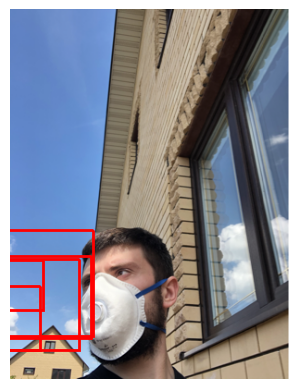

In [44]:
# preview_img = Image.open(os.path.join(img_dir, img_file))
# fig, ax = plt.subplots(1, 1)
# ax.imshow(preview_img)

# for index, box in enumerate(preds_bounding_box):
#     x_min, y_min, x_max, y_max = box
    
#     x_min = x_min.item()
#     y_min = y_min.item()
#     x_max = x_max.item()
#     y_max = y_max.item()
    
#     rect = patches.Rectangle([x_min, y_min], x_max - y_max, y_max - y_min, linewidth=2, edgecolor = "r", facecolor="none")
#     ax.add_patch(rect)

# ax.axis(False)